In [ ]:
from statistics import mean,variance,stdev
from time import time
import pandas as pd
import numpy as np
import math
!(pip install statds)
from statds.no_parametrics import friedman,bonferroni,wilconxon


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.3 MB/s eta 0:00:00


#Hill Climbing

##Código Base

In [ ]:
import random

def evaluarSolucion(datos, solucion):
    error = 0
    for x,y in datos:
        yEstimada=0
        indice=0
        for i in solucion:
            yEstimada+=i*(x**indice)
            indice+=1
        error+=abs(yEstimada-y)
    return error/len(datos)

def obtenerMejorVecino(solucion, datos):
    ##Obtención de los vecinos
    vecinos = []
    for i in range(len(solucion)):
        n1 = solucion.copy()

        n2 = solucion.copy()
        n1[i]+=1
        n2[i]-=1

        vecinos.append(n1)
        vecinos.append(n2)

    ##Obtención del mejor vecino
    mejorVecino = vecinos[0]
    mejorError = evaluarSolucion(datos, mejorVecino)
    for vecino in vecinos:
        error = evaluarSolucion(datos, vecino)
        if error < mejorError:
            mejorError = error
            mejorVecino = vecino
    return mejorVecino, mejorError

def hillClimbing(datos,valorMin,valorMax):
    l=7 #Funcion del tipo y = ax^6+bx^5+cx^4+dx^3+ex^2+fx+g
    ##Creamos una solucion aleatoria
    solucion = []
    for i in range(l):
        variable = random.randint(valorMin,valorMax)
        solucion.append(variable)
    error = evaluarSolucion(datos, solucion)

    #print("Error de la solucion: ", error, "\tSolucion parcial: ", solucion)
    vecino = obtenerMejorVecino(solucion, datos)
    while vecino[1] < error:
        solucion = vecino[0]
        error = vecino[1]
        #print("Error de la solucion: ", error, "\tSolucion parcial: ", solucion)
        vecino = obtenerMejorVecino(solucion, datos)

    return solucion, error
datos = [
        [-3, 208],
        [-2, 3],
        [-1, 0],
        [0, 1],
        [1, 24],
        [2, 303],
        [3, 2008]
    ]

valorMin=-100
valorMax=100
s=hillClimbing(datos,valorMin,valorMax)
print("--------------")
print("Solucion final: ",s[0])
print("Error de la solucion: ",s[1])



--------------
Solucion final:  [40, 86, 1, -75, -23, 11, 4]
Error de la solucion:  74.71428571428571


##Funciones Generales

In [ ]:
def eval(func_vecinos,datos,valorMaxRango,incr,tam_med,verbose=False):
  def HillClimbingTemplate(func_vecinos,datos,valorMin,valorMax):
    l=7 #Funcion del tipo y = ax^6+bx^5+cx^4+dx^3+ex^2+fx+g
    ##Creamos una solucion aleatoria
    solucion = []
    for i in range(l):
        variable = random.randint(valorMin,valorMax)
        solucion.append(variable)
    error = evaluarSolucion(datos, solucion)

    #print("Error de la solucion: ", error, "\tSolucion parcial: ", solucion)
    vecino = func_vecinos(solucion, datos)
    while vecino[1] < error:
        solucion = vecino[0]
        error = vecino[1]
        #print("Error de la solucion: ", error, "\tSolucion parcial: ", solucion)
        vecino = func_vecinos(solucion, datos)

    return solucion, error


  tam_rangos = []
  err_med = []
  err_std = []
  tiem_med = []
  tiem_std = []
  tam = 0
  while tam <= valorMaxRango :
    if verbose:
      print(f'Iteración del rango ({tam*-1},{tam})')
    tam_rangos.append(tam)

    valorMin=tam*-1
    valorMax=tam
    err_it = []
    tiem_it = []
    for i in range(tam_med):
      tiempoInicio = time()
      s= HillClimbingTemplate(func_vecinos,datos,valorMin,valorMax)
      tiem_it.append((time()-tiempoInicio)*1000)
      err_it.append(s[1])
    err_med.append(mean(err_it))
    err_std.append(stdev(err_it))
    tiem_med.append(mean(tiem_it))
    tiem_std.append(stdev(tiem_it))

    tam= tam+incr

  return tam_rangos,err_med,tiem_med,err_std,tiem_std

In [ ]:
import matplotlib.pyplot as plt

def plot_individual(tam_rangos,err_med,tiem_med,err_std,tiem_std,label,log_err=False,log_tiem=False):
  err_lim_sup = [e1 + e2 for e1, e2 in zip(err_med,err_std)]
  err_lim_inf = [e1 - e2 for e1, e2 in zip(err_med,err_std)]
  tiem_lim_sup = [e1 + e2 for e1, e2 in zip(tiem_med,tiem_std)]
  tiem_lim_inf = [e1 - e2 for e1, e2 in zip(tiem_med,tiem_std)]
  figure,axis = plt.subplots(1,2)
  if log_err:
      axis[0].set_yscale('log')
  if log_tiem:
    axis[1].set_yscale('log')

  axis[0].plot(tam_rangos,err_med,color='b',label=label)
  axis[0].plot(tam_rangos,err_lim_sup,color='g',linestyle='dashed',label=label+'±σ')
  axis[0].plot(tam_rangos,err_lim_inf,color='g',linestyle='dashed')
  axis[0].set_xlabel('Rango de valores (-x,x)')
  axis[0].set_ylabel('Error Medio')
  axis[0].set_title('ErrorMedio/RangoValores')
  axis[0].legend()

  axis[1].plot(tam_rangos,tiem_med,color='b',label=label)
  axis[1].plot(tam_rangos,tiem_lim_sup,color='g',linestyle='dashed',label=label+'±σ')
  axis[1].plot(tam_rangos,tiem_lim_inf,color='g',linestyle='dashed')
  axis[1].set_xlabel('Rango de valores (-x,x)')
  axis[1].set_ylabel('TiempoEjecución(ms)')
  axis[1].set_title('TiempoEjecución/RangoValores')
  axis[1].legend()
  plt.tight_layout()
  plt.show()

In [ ]:
def plot_doble(tam_rangos,err_med1,tiem_med1,err_std1,tiem_std1,err_med2,tiem_med2,err_std2,tiem_std2,label1,label2,log_err=False,log_tiem=False):
  err_lim_sup1 = [e1 + e2 for e1, e2 in zip(err_med1,err_std1)]
  err_lim_inf1 = [e1 - e2 for e1, e2 in zip(err_med1,err_std1)]
  tiem_lim_sup1 = [e1 + e2 for e1, e2 in zip(tiem_med1,tiem_std1)]
  tiem_lim_inf1 = [e1 - e2 for e1, e2 in zip(tiem_med1,tiem_std1)]

  err_lim_sup2 = [e1 + e2 for e1, e2 in zip(err_med2,err_std2)]
  err_lim_inf2 = [e1 - e2 for e1, e2 in zip(err_med2,err_std2)]
  tiem_lim_sup2 = [e1 + e2 for e1, e2 in zip(tiem_med2,tiem_std2)]
  tiem_lim_inf2 = [e1 - e2 for e1, e2 in zip(tiem_med2,tiem_std2)]

  figure,axis = plt.subplots(1,2)
  if log_err:
      axis[0].set_yscale('log')
  if log_tiem:
    axis[1].set_yscale('log')

  axis[0].plot(tam_rangos,err_med1,color='b',label=label1)

  axis[0].plot(tam_rangos,err_med2,color='r',label=label2)


  axis[0].set_xlabel('Rango de valores (-x,x)')
  axis[0].set_ylabel('Error Medio')
  axis[0].set_title('ErrorMedio/RangoValores')
  axis[0].legend()

  axis[1].plot(tam_rangos,tiem_med1,color='b',label=label1)


  axis[1].plot(tam_rangos,tiem_med2,color='r',label=label2)

  axis[1].set_xlabel('Rango de valores (-x,x)')
  axis[1].set_ylabel('TiempoEjecución(ms)')
  axis[1].set_title('TiempoEjecución/RangoValores')
  axis[1].legend()
  plt.tight_layout()
  plt.show()


In [ ]:
def plot_general(tam_rangos,err_meds,tiem_meds,err_stds,tiem_stds,labels,log_err=False,log_tiem=False):
  colors = ['b', 'r', 'g', 'c', 'm', 'y', 'k']
  figure,axis = plt.subplots(1,2)
  for i in range(len(err_meds)):

    # err_lim_sup = [e1 + e2 for e1, e2 in zip(err_med,err_std)]
    # err_lim_inf = [e1 - e2 for e1, e2 in zip(err_med,err_std)]
    # tiem_lim_sup = [e1 + e2 for e1, e2 in zip(tiem_med,tiem_std)]
    # tiem_lim_inf = [e1 - e2 for e1, e2 in zip(tiem_med,tiem_std)]

    if log_err:
      axis[0].set_yscale('log')
    if log_tiem:
      axis[1].set_yscale('log')

    axis[0].plot(tam_rangos,err_meds[i],color=colors[i],label=labels[i])

    axis[0].set_xlabel('Rango de valores (-x,x)')
    axis[0].set_ylabel('Error Medio')
    axis[0].set_title('ErrorMedio/RangoValores')


    axis[1].plot(tam_rangos,tiem_meds[i],color=colors[i],label=labels[i])

    axis[1].set_xlabel('Rango de valores (-x,x)')
    axis[1].set_ylabel('TiempoEjecución(ms)')
    axis[1].set_title('TiempoEjecución/RangoValores')
  axis[0].legend()
  axis[1].legend()
  plt.tight_layout()
  plt.show()

In [ ]:
def test_fried_bonf(tam_rangos,errs,labels,l_obj=None):
  metodos = labels.copy()
  results_scores = {met: [] for met in metodos}

  for i in range(len(tam_rangos)):
    for j in range(len(errs)):
      results_scores[labels[j]].append(errs[j][i])

  dataset = pd.DataFrame(results_scores)
  results_to_test = dataset.copy()
  alpha = 0.05
  columns = list(results_to_test.columns)
  results = []

  rankings, statistic, p_value, critical_value, hypothesis = friedman(dataset, alpha,minimize=True)

  print(hypothesis)
  print(f"Statistic {statistic}, p-value {p_value}")
  print(rankings)
  resultados,figura = bonferroni(rankings,len(tam_rangos),alpha,control= l_obj)
  print(resultados)
  figura.show()


##Prueba para ver como aumenta el error con el rango de valores

In [ ]:
tam_rangos,err_med,tiem_med,err_std,tiem_std = eval(obtenerMejorVecino,datos,200,5,40)

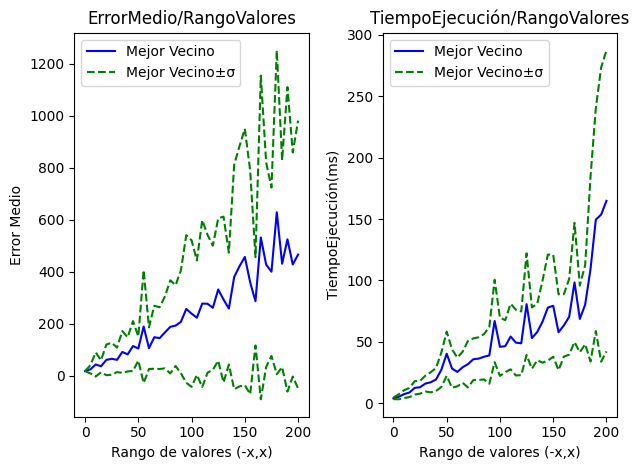

In [ ]:
plot_individual(tam_rangos,err_med,tiem_med,err_std,tiem_std,'Mejor Vecino')

##Prueba para comprobar si con elección  de una pendiente aleatoria el rendimiento mejora

In [ ]:
def obtenerVecinoAleatorio(solucion, datos):
    ##Obtención de los vecinos
    vecinos = []
    for i in range(len(solucion)):
        n1 = solucion.copy()
        n2 = solucion.copy()
        n1[i]+=1
        n2[i]-=1

        vecinos.append(n1)
        vecinos.append(n2)

    ##Obtención del primer mejor vecino
    random.shuffle(vecinos)
    mejorVecino = solucion
    mejorError = evaluarSolucion(datos, mejorVecino)
    for vecino in vecinos:
        error = evaluarSolucion(datos, vecino)
        if error < mejorError:
            mejorError = error
            mejorVecino = vecino
            return mejorVecino, mejorError

    return mejorVecino, mejorError


In [ ]:
#tam_rangos,err_med,tiem_med,med,st = eval(obtenerMejorVecino,datos,200,5,5)
tam_rangos_rand,err_med_rand,tiem_med_rand,err_std_rand,tiem_std_rand = eval(obtenerVecinoAleatorio,datos,200,5,40)

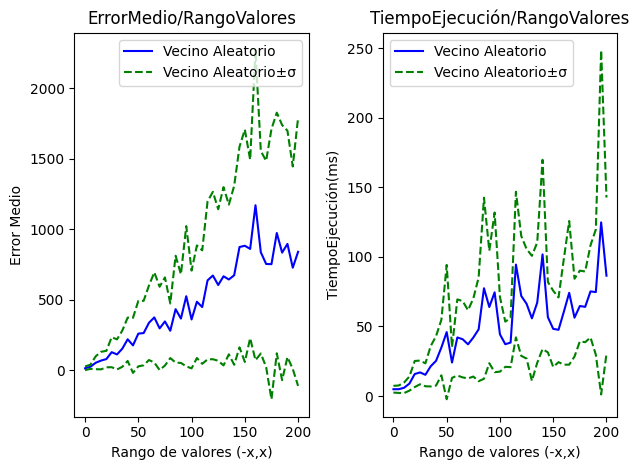

In [ ]:
plot_individual(tam_rangos_rand,err_med_rand,tiem_med_rand,err_std_rand,tiem_std_rand,'Vecino Aleatorio')

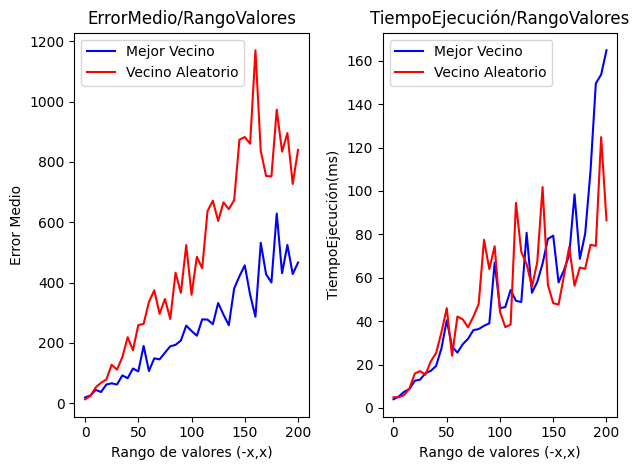

In [ ]:
plot_doble(tam_rangos_rand,err_med,tiem_med,err_std,tiem_std,err_med_rand,tiem_med_rand,err_std_rand,tiem_std_rand,'Mejor Vecino','Vecino Aleatorio')

##Dos soluciones son vecinas únicamente si sólo una variable es diferente, sin importar cuán diferente es dicha variable. Las soluciones [2, 3, 1, 0, 0, 4, 3] y [2, 3, 1, 0, 0, 4, 0] son vecinas, pero las soluciones [2, 3, 1, 0, 0, 4, 3] y [2, 3, 1, 0, 0, 3, 4] no lo son.

In [ ]:
def obtenerMejorVecinoUnivariable(solucion, datos):
    ##Obtención de los vecinos
    rango = 10
    vecinos = []
    for i in range(0,len(solucion)):
      for j in range(1,rango+1):
        s1 = solucion.copy()
        s1[i]+=j

        s2 = solucion.copy()
        s2[i]-=j
        vecinos.append(s1)
        vecinos.append(s2)

    ##Obtención del mejor vecino
    mejorVecino = vecinos[0]
    mejorError = evaluarSolucion(datos, mejorVecino)
    for vecino in vecinos:
        error = evaluarSolucion(datos, vecino)
        if error < mejorError:
            mejorError = error
            mejorVecino = vecino
    return mejorVecino, mejorError


In [ ]:
#tam_rangos,err_med,tiem_med,med,st = eval(obtenerMejorVecino,datos,200,5,5)
tam_rangos_1_dif,err_med_1_dif,tiem_med_1_dif,err_std_1_dif,tiem_std_1_dif = eval(obtenerMejorVecinoUnivariable,datos,200,5,40)

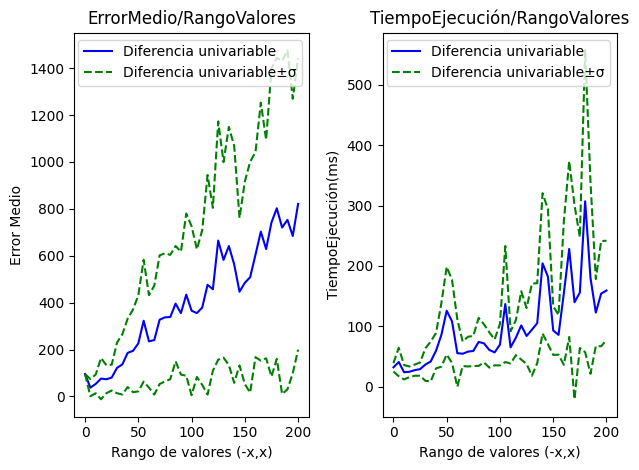

In [ ]:
plot_individual(tam_rangos_1_dif,err_med_1_dif,tiem_med_1_dif,err_std_1_dif,tiem_std_1_dif,'Diferencia univariable')

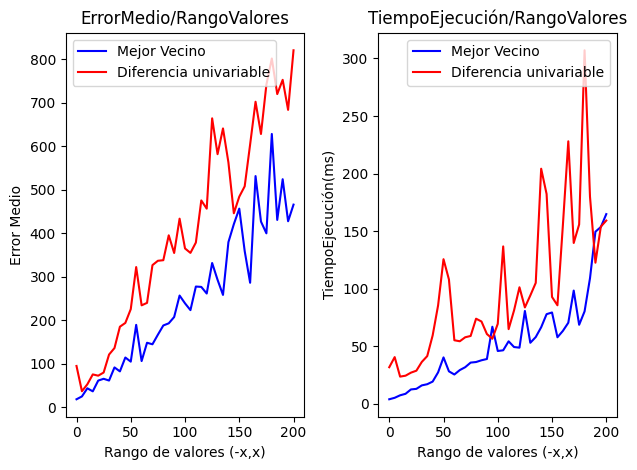

In [ ]:
plot_doble(tam_rangos,err_med,tiem_med,err_std,tiem_std,err_med_1_dif,tiem_med_1_dif,err_std_1_dif,tiem_std_1_dif,'Mejor Vecino','Diferencia univariable')

##Dos soluciones son vecinas si los valores de cualquiera de las variables sólo se diferencia en una unidad. No importa el número de variables diferentes. Las soluciones [2, 3, 1, 0, 0, 4, 3] y [1, 2, 0, 1, 0, 4, 3] son vecinas, pero las soluciones [2, 3, 1, 0, 0, 4, 3] y [0, 3, 1, 0, 0, 4, 3] no lo son.

In [ ]:
from itertools import product
def generarCombinaciones():
  opciones = [-1, 0, 1]
  combinaciones = list(product(opciones, repeat=7))
  c = [list(combinacion) for combinacion in combinaciones]

  return c
combinaciones = generarCombinaciones()

In [ ]:

def obtenerMejorVecinoMultivariable(solucion, datos):
    ##Obtención de los vecinos

    def generarVecinosMultivariable(solucion, vecinos):
      vecinos.append(solucion)
      vecinos = []
      for combinacion in combinaciones:
          vecino = [s + c for s, c in zip(solucion, combinacion)]
          vecinos.append(vecino)

      return vecinos



    vecinos = []

    vecinos = generarVecinosMultivariable(solucion,vecinos)


    ##Obtención del mejor vecino
    mejorVecino = vecinos[0]
    mejorError = evaluarSolucion(datos, mejorVecino)
    for vecino in vecinos:
        error = evaluarSolucion(datos, vecino)
        if error < mejorError:
            mejorError = error
            mejorVecino = vecino
    return mejorVecino, mejorError


In [ ]:
#tam_rangos,err_med,tiem_med,med,st = eval(obtenerMejorVecino,datos,200,5,5)
#Ejecutar la linea siguiente( Este es el importante de la celda)
#tam_rangos_dif_1,err_med_dif_1,tiem_med_dif_1,err_std_dif_1,tiem_std_dif_1 = eval(obtenerMejorVecinoMultivariable,datos,200,5,40)
err_med_dif_1 = [0.0, 13.6, 23.689285714285713, 34.596428571428575, 46.464285714285715, 45.06428571428572, 59.04642857142857, 64.97142857142858, 92.13571428571429, 79.71785714285714, 105.33928571428571, 127.50357142857143, 120.74285714285715, 144.68928571428572, 131.27857142857144, 126.14285714285714, 143.09642857142856, 161.29285714285714, 160.0392857142857, 178.08928571428572, 181.19285714285715, 233.2357142857143, 206.95357142857142, 185.925, 259.60714285714283, 248.775, 275.9428571428571, 273.3357142857143, 224.4607142857143, 287.8857142857143, 314.8, 319.38214285714287, 313.10357142857146, 319.8107142857143, 383.82142857142856, 391.3178571428571, 319.54285714285714, 416.7892857142857, 374.4321428571429, 347.7714285714286, 358.85]
tiem_med_dif_1 = [395.7732558250427, 519.2757785320282, 734.7748816013336, 939.5755290985107, 1324.341493844986, 1294.213491678238, 1821.0589289665222, 1899.6200621128082, 2767.400085926056, 2549.6930718421936, 3069.1427409648895, 3775.4733622074127, 3765.1384592056274, 3703.494966030121, 3502.2561252117157, 3669.60626244545, 4417.402094602585, 4232.945257425308, 5257.904475927353, 5068.408650159836, 5321.628910303116, 5736.125659942627, 5530.458062887192, 6338.439357280731, 7085.131400823593, 6694.166165590286, 7589.371633529663, 6696.18666768074, 6741.368687152863, 7892.583340406418, 7406.621766090393, 7609.090423583984, 7897.987949848175, 8849.619406461716, 9820.217496156693, 9233.913576602936, 9200.651377439499, 12007.881373167038, 10139.467310905457, 10106.182533502579, 11435.43764948845]
err_std_dif_1 = [0.0, 10.921402278744731, 15.44199278873307, 21.280314665327758, 24.1274470185658, 28.281846592419182, 32.614960105918, 39.23654198710976, 42.24775484112317, 41.71964800072059, 53.54630118887711, 57.72994191139137, 62.07126270331956, 68.28638011767895, 70.53193234169528, 60.17578470955555, 82.40306540647045, 68.04274943677504, 76.75936416436657, 98.2576451075573, 93.20699689409426, 96.00068435784328, 101.88109026782215, 105.71514199979904, 141.5293227176133, 123.17435786679562, 138.49324783719234, 130.24807690888008, 127.74255199118383, 150.38975075579924, 146.3658913465151, 145.85307398722443, 164.980343841329, 155.127133046146, 177.2679392670703, 170.50869035830044, 176.0290316667517, 200.85048886560128, 214.57775578654065, 185.63868509124686, 194.26048896250583]
tiem_std_dif_1 = [77.18975252161265, 187.33849947031607, 442.1107043171252, 561.0302873311387, 659.2309922319074, 560.3076245545334, 839.641271134885, 1181.4215146694978, 1809.0698239108374, 1456.2065759164907, 1605.6703870009665, 1927.5731149748106, 2295.3657984417264, 2094.763262817925, 1768.9715261776025, 2168.4665161398675, 2711.986597476066, 2307.1570866219427, 2778.9587125905887, 3152.5203185152673, 2489.345783668599, 2857.7439204404745, 3502.834413965064, 3297.3933261638026, 4464.018236251317, 3351.425408845918, 4103.284020192579, 4190.828967914825, 3529.537683162862, 4143.755180239738, 4400.471187150533, 3756.7498573529606, 4280.759355355486, 5230.23223453926, 5820.73385253996, 5139.549625142184, 5417.055714674368, 6689.689698525836, 4306.3637483622315, 5814.083973143078, 6345.179762496529]

In [ ]:
print(err_med_dif_1)
print(tiem_med_dif_1)
print(err_std_dif_1)
print(tiem_std_dif_1)

[0.0, 13.6, 23.689285714285713, 34.596428571428575, 46.464285714285715, 45.06428571428572, 59.04642857142857, 64.97142857142858, 92.13571428571429, 79.71785714285714, 105.33928571428571, 127.50357142857143, 120.74285714285715, 144.68928571428572, 131.27857142857144, 126.14285714285714, 143.09642857142856, 161.29285714285714, 160.0392857142857, 178.08928571428572, 181.19285714285715, 233.2357142857143, 206.95357142857142, 185.925, 259.60714285714283, 248.775, 275.9428571428571, 273.3357142857143, 224.4607142857143, 287.8857142857143, 314.8, 319.38214285714287, 313.10357142857146, 319.8107142857143, 383.82142857142856, 391.3178571428571, 319.54285714285714, 416.7892857142857, 374.4321428571429, 347.7714285714286, 358.85]
[395.7732558250427, 519.2757785320282, 734.7748816013336, 939.5755290985107, 1324.341493844986, 1294.213491678238, 1821.0589289665222, 1899.6200621128082, 2767.400085926056, 2549.6930718421936, 3069.1427409648895, 3775.4733622074127, 3765.1384592056274, 3703.494966030121

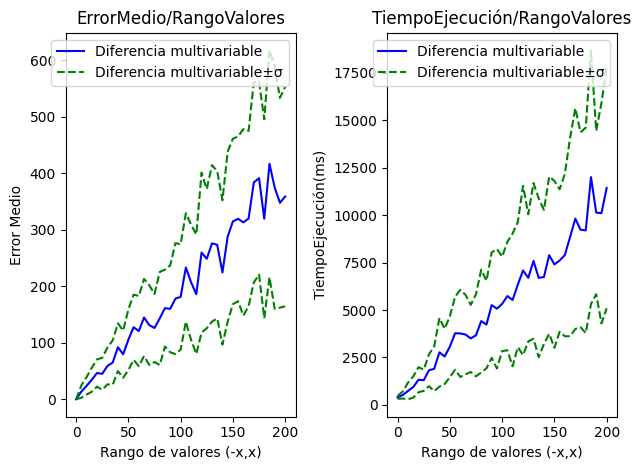

In [ ]:
plot_individual(tam_rangos,err_med_dif_1,tiem_med_dif_1,err_std_dif_1,tiem_std_dif_1,'Diferencia multivariable')

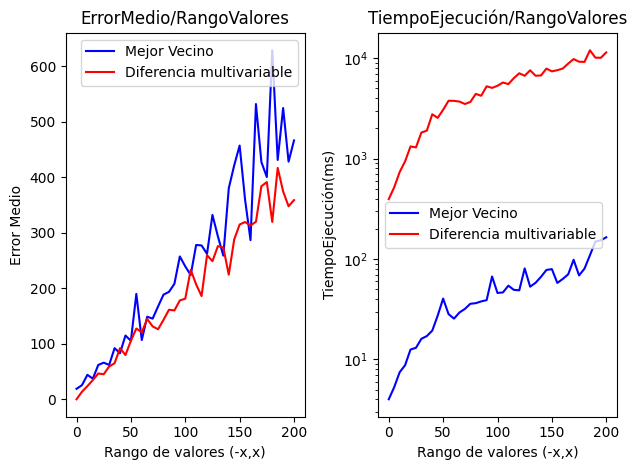

In [ ]:
plot_doble(tam_rangos_rand,err_med,tiem_med,err_std,tiem_std,err_med_dif_1,tiem_med_dif_1,err_std_dif_1,tiem_std_dif_1,'Mejor Vecino','Diferencia multivariable',False,True)

##Propón un tipo de vecindario diferente para el Hill Climbing por la máxima pendiente. Analiza los resultados y compáralos con todas las propuestas vistas hasta ahora en esta práctica.

In [ ]:
def obtenerMejorVecinoMejor(solucion,datos):
  def generarVecinosMejor(solucion,vecinos):
    r = random.randint(1,3)

    if r == 3:
        index = random.randint(0,len(solucion)-1)
        sum = random.randint(-10,10)
        s0 = solucion.copy()
        s0[index]+= sum
        vecinos.append(s0)

    s1 = solucion.copy()
    s2 = solucion.copy()
    vecinos = []
    for i in range(len(solucion)):
        n1 = solucion.copy()
        n2 = solucion.copy()
        n1[i]+=1
        n2[i]-=1

        vecinos.append(n1)
        vecinos.append(n2)
    return vecinos

  ##Obtención de los vecinos
  vecinos = []
  vecinos = generarVecinosMejor(solucion,vecinos)

  ##Obtención del mejor vecino
  mejorVecino = vecinos[0]
  mejorError = evaluarSolucion(datos, mejorVecino)
  for vecino in vecinos:
      error = evaluarSolucion(datos, vecino)
      if error < mejorError:
          mejorError = error
          mejorVecino = vecino
  return mejorVecino, mejorError


In [ ]:
#tam_rangos,err_med,tiem_med,med,st = eval(obtenerMejorVecino,datos,200,5,5)
tam_rangos_nue_sol,err_med_nue_sol,tiem_med_nue_sol,err_std_nue_sol,tiem_std_nue_sol = eval(obtenerMejorVecinoMejor,datos,200,5,40)

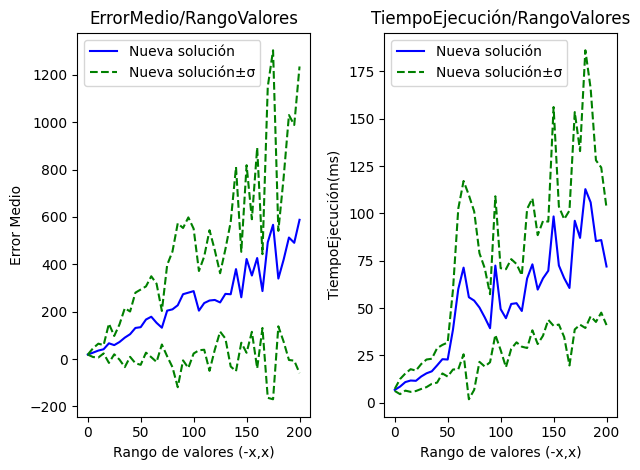

In [ ]:
plot_individual(tam_rangos_nue_sol,err_med_nue_sol,tiem_med_nue_sol,err_std_nue_sol,tiem_std_nue_sol,'Nueva solución')

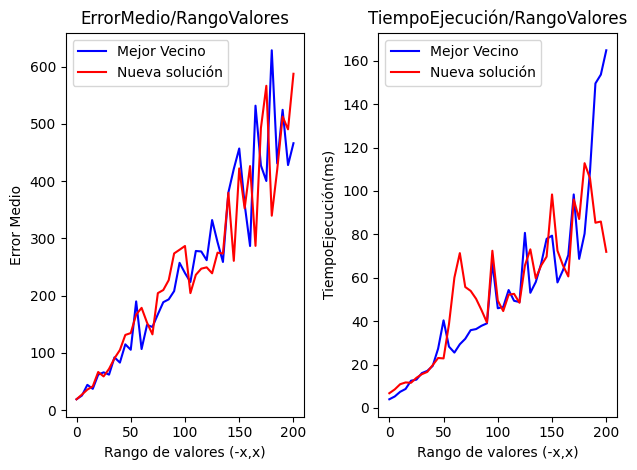

In [ ]:
plot_doble(tam_rangos,err_med,tiem_med,err_std,tiem_std,err_med_nue_sol,tiem_med_nue_sol,err_std_nue_sol,tiem_std_nue_sol,'Mejor Vecino','Nueva solución')

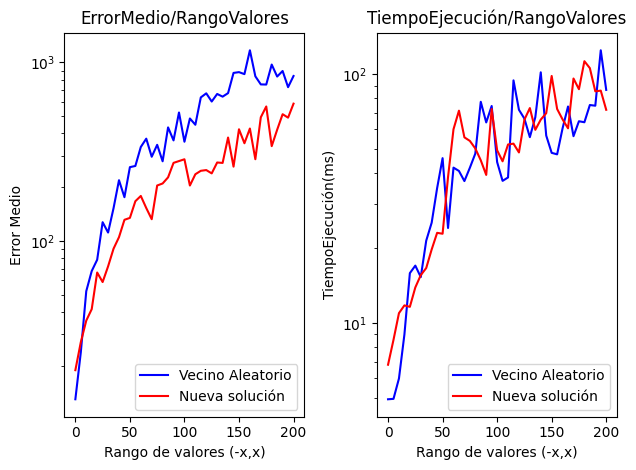

In [ ]:
plot_doble(tam_rangos,err_med_rand,tiem_med_rand,err_std_rand,tiem_std_rand,err_med_nue_sol,tiem_med_nue_sol,err_std_nue_sol,tiem_std_nue_sol,'Vecino Aleatorio','Nueva solución',True,True)

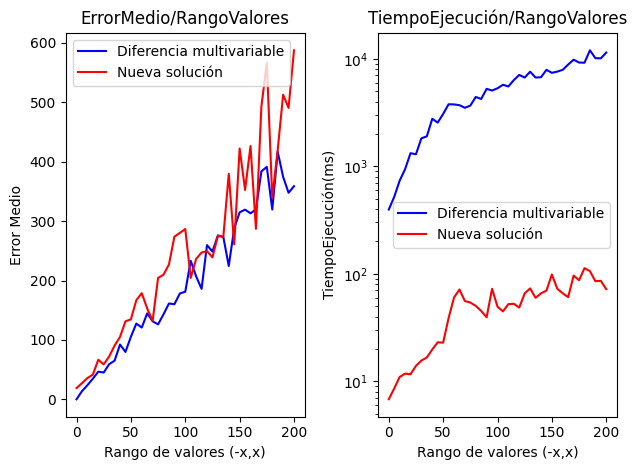

In [ ]:
plot_doble(tam_rangos,err_med_dif_1,tiem_med_dif_1,err_std_dif_1,tiem_std_dif_1,err_med_nue_sol,tiem_med_nue_sol,err_std_nue_sol,tiem_std_nue_sol,'Diferencia multivariable','Nueva solución',False,True)

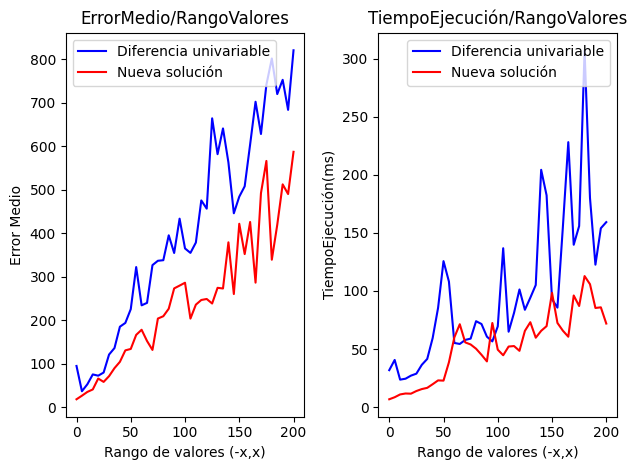

In [ ]:
plot_doble(tam_rangos,err_med_1_dif,tiem_med_1_dif,err_std_1_dif,tiem_std_1_dif,err_med_nue_sol,tiem_med_nue_sol,err_std_nue_sol,tiem_std_nue_sol,'Diferencia univariable','Nueva solución')

In [ ]:
labels = ['Vecino Aleatorio','Mejor Vecino','Diferencia Multivariable','Diferencia Univariable','Nueva Solución']
errs = [err_med_rand,err_med,err_med_dif_1,err_med_1_dif,err_med_nue_sol]

Different distributions (reject H0) with alpha 0.05
Statistic 93.5634146341464, p-value 6.510048056185269e-11
{'Mejor Vecino': 2.3536585365853657, 'Diferencia Multivariable': 1.2682926829268293, 'Diferencia Univariable': 4.0, 'Nueva Solución': 2.3780487804878048}
                                   Comparison  Statistic (Z)       p-value  \
0              Nueva Solución vs Mejor Vecino       0.085540  9.318322e-01   
1  Nueva Solución vs Diferencia Multivariable       3.892065  9.939457e-05   
2    Nueva Solución vs Diferencia Univariable       5.688403  1.282330e-08   

   Adjusted alpha  Adjusted p-value  alpha         Results  
0        0.016667      1.000000e+00   0.05  H0 is accepted  
1        0.016667      2.981837e-04   0.05  H0 is rejected  
2        0.016667      3.846991e-08   0.05  H0 is rejected  


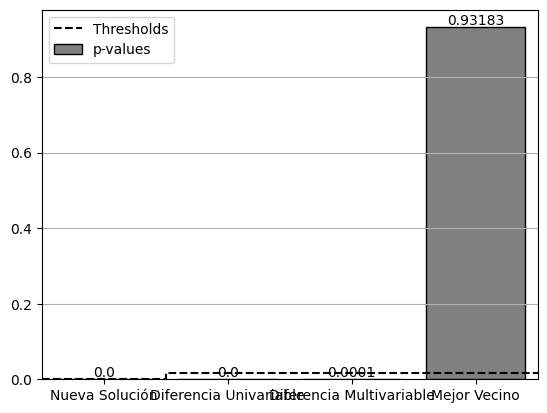

In [ ]:
test_fried_bonf(tam_rangos,errs,labels,'Nueva Solución')

#Simulated Annealing

##Funciones Generales

In [ ]:
import math
import random
import statistics

In [ ]:
def eval_s(func_vecinos,func_enfriamiento,t0,datos,valorMaxRango,incr,tam_med,verbose=False):
  def SimulatedAnnealingTemplate(func_vecinos,func_enfriamiento,t0,datos,valorMin,valorMax):

    l=7 #Funcion del tipo y = ax^6+bx^5+cx^4+dx^3+ex^2+fx+g
    ##Creamos una solucion aleatoria
    solucion = []
    for i in range(l):
        variable = random.randint(valorMin,valorMax)
        solucion.append(variable)
    error = evaluarSolucion(datos, solucion)
    t=t0

    it=0
    while t > 0.05:
        ##Obtenemos un vecino al azar
        vecino = func_vecinos(solucion, datos)
        incremento = vecino[1]-error

        if incremento < 0:
            error = vecino[1]
            solucion = vecino[0]
        elif random.random() < math.exp(-abs(incremento) / t):
            error = vecino[1]
            solucion = vecino[0]

        it+=1
        t=func_enfriamiento(t)
        #print("Error de la solución: ", error)
        #print("Temperatura: ", t)
    return solucion, error

  tam_rangos = []
  err_med = []
  err_std = []
  tiem_med = []
  tiem_std = []
  tam = 0
  while tam <= valorMaxRango :
    if verbose:
      print(f'Iteración del rango ({tam*-1},{tam})')
    tam_rangos.append(tam)

    valorMin=tam*-1
    valorMax=tam
    err_it = []
    tiem_it = []
    for i in range(tam_med):
      tiempoInicio = time()
      s= SimulatedAnnealingTemplate(func_vecinos,func_enfriamiento,t0,datos,valorMin,valorMax)
      tiem_it.append((time()-tiempoInicio)*1000)
      err_it.append(s[1])

    err_med.append(mean(err_it))
    err_std.append(stdev(err_it))
    tiem_med.append(mean(tiem_it))
    tiem_std.append(stdev(tiem_it))

    tam= tam+incr

  return tam_rangos,err_med,tiem_med,err_std,tiem_std

##Prueba Inicial (t' = 0.99t)

In [ ]:
def obtenerVecino(solucion, datos):
    ##Obtención de los vecinos
    vecinos = []
    for i in range(len(solucion)):
        n1 = solucion.copy()
        n2 = solucion.copy()
        n1[i]+=1
        n2[i]-=1

        vecinos.append(n1)
        vecinos.append(n2)

    ##Obtengo un vecino aleatorio
    vecino=vecinos[random.randint(0, len(vecinos) - 1)]
    error = evaluarSolucion(datos, vecino)

    return vecino, error
def cool_1per(t):
  return 0.99*t



In [ ]:
tam_rangos_1per,err_med_1per,tiem_med_1per,err_std_1per,tiem_std_1per = eval_s(obtenerVecino,cool_1per,10,datos,200,5,40)

In [ ]:
plot_individual(tam_rangos_1per,err_med_1per,tiem_med_1per,err_std_1per,tiem_std_1per,'t\' = 0.99t',True)

##El uso de diferentes funciones de enfriamiento no tiene ningún efecto en los resultados (soluciones y tiempos).


In [ ]:
def cool_1per(t):
  return 0.99*t
def cool_05per(t):
  return 0.995*t
def cool_halfper(t):
  return 0.5*t
def cool_logper(t):
  return math.log(t)

In [ ]:
tam_rangos_1per,err_med_1per,tiem_med_1per,err_std_1per,tiem_std_1per = eval_s(obtenerVecino,cool_1per,10,datos,200,5,40)
tam_rangos_05per,err_med_05per,tiem_med_05per,err_std_05per,tiem_std_05per = eval_s(obtenerVecino,cool_05per,10,datos,200,5,40)
tam_rangos_halfper,err_med_halfper,tiem_med_halfper,err_std_halfper,tiem_std_halfper = eval_s(obtenerVecino,cool_halfper,10,datos,200,5,40)
tam_rangos_logper,err_med_logper,tiem_med_logper,err_std_logper,tiem_std_logper = eval_s(obtenerVecino,cool_logper,10,datos,200,5,40)

errs = [err_med_1per,err_med_05per,err_med_halfper,err_med_logper]
tiems = [tiem_med_1per,tiem_med_05per,tiem_med_halfper,tiem_med_logper]
err_stds = [err_std_1per,err_std_05per,err_std_halfper,err_std_logper]
tiem_stds = [tiem_std_1per,tiem_std_05per,tiem_std_halfper,tiem_std_logper]
labels = ['t\' = 0.99t','t\' = 0.995t','t\' = 0.5t','t\' = log(t)']

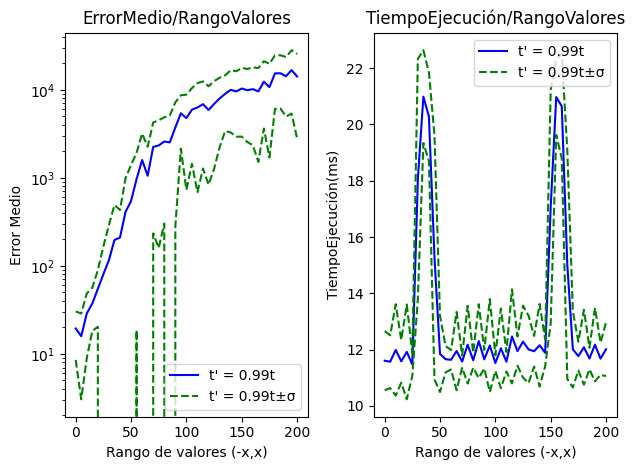

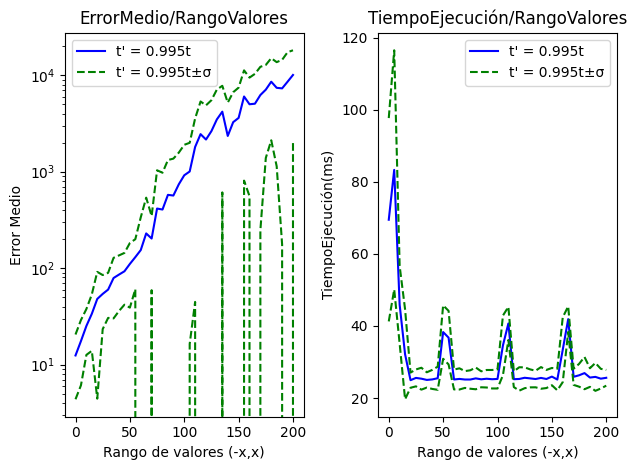

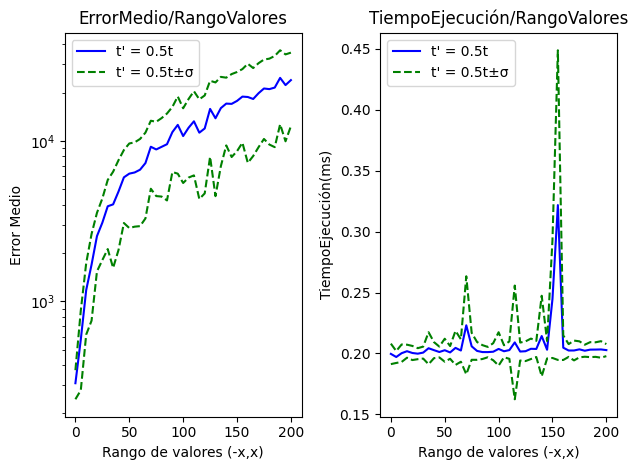

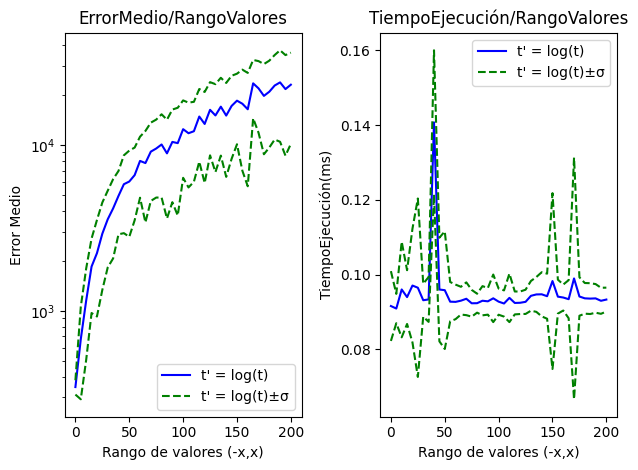

In [ ]:
tam_rangos = tam_rangos_1per.copy()
plot_individual(tam_rangos,err_med_1per,tiem_med_1per,err_std_1per,tiem_std_1per,'t\' = 0.99t',True)
plot_individual(tam_rangos,err_med_05per,tiem_med_05per,err_std_05per,tiem_std_05per,'t\' = 0.995t',True)
plot_individual(tam_rangos,err_med_halfper,tiem_med_halfper,err_std_halfper,tiem_std_halfper,'t\' = 0.5t',True)
plot_individual(tam_rangos,err_med_logper,tiem_med_logper,err_std_logper,tiem_std_logper,'t\' = log(t)',True)

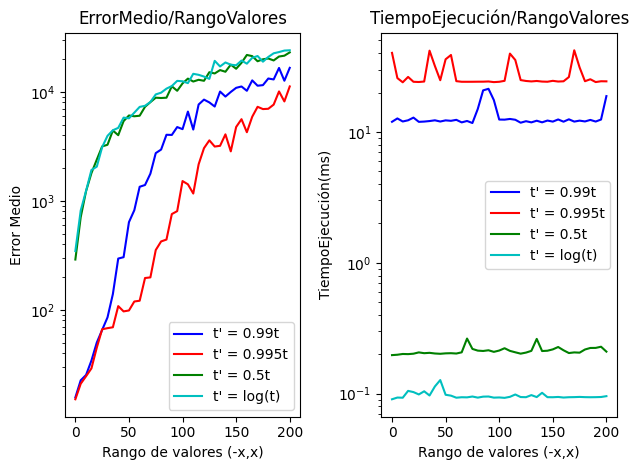

In [ ]:
plot_general(tam_rangos,errs,tiems,err_stds,tiem_stds,labels,True,True)

##Nueva Función de Enfriamiento

A pesar de que no viene especificado en la práctica se ha decido estudiar si el hecho de que la temperatura decrezca más lentamente mejora los resultados

In [ ]:
def cool_mejor(t):
  return 0.995*t

In [ ]:
tam_rangos_1per,err_med_1per,tiem_med_1per,err_std_1per,tiem_std_1per = eval_s(obtenerVecino,cool_1per,10,datos,200,5,40)
tam_rangos_mejor,err_med_mejor,tiem_med_mejor,err_std_mejor,tiem_std_mejor = eval_s(obtenerVecino,cool_mejor,10,datos,200,5,40)
errs = [err_med_1per,err_med_mejor]
tiems = [tiem_med_1per,tiem_med_mejor]
err_stds = [err_std_1per,err_std_mejor]
tiem_stds = [tiem_std_1per,tiem_std_mejor]
labels = ['t\' = 0.99t','t\' = 0.995t']

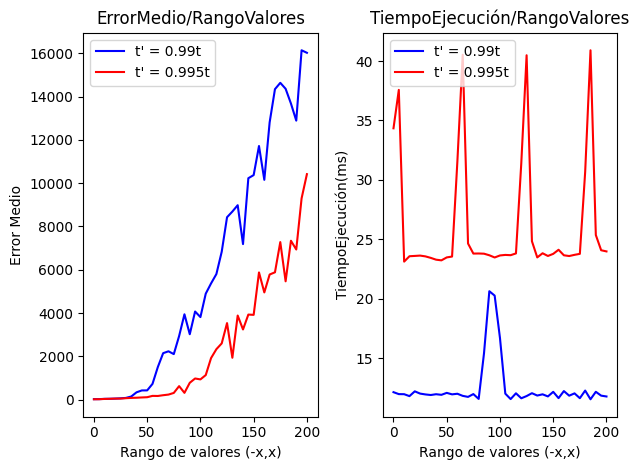

In [ ]:
plot_general(tam_rangos,errs,tiems,err_stds,tiem_stds,labels,False,False)

##El uso de vecindarios diferentes tiene un gran impacto en las soluciones.


In [ ]:
def obtenerVecino(solucion, datos):
    ##Obtención de los vecinos
    vecinos = []
    for i in range(len(solucion)):
        n1 = solucion.copy()
        n2 = solucion.copy()
        n1[i]+=1
        n2[i]-=1

        vecinos.append(n1)
        vecinos.append(n2)

    ##Obtengo un vecino aleatorio
    vecino=vecinos[random.randint(0, len(vecinos) - 1)]
    error = evaluarSolucion(datos, vecino)

    return vecino, error

In [ ]:
def obtenerVecinoMultivariable(solucion, datos):
    ##Obtención de los vecinos

    def generarVecinosMultivariable(solucion, vecinos):
      vecinos.append(solucion)
      vecinos = []
      for combinacion in combinaciones:
          vecino = [s + c for s, c in zip(solucion, combinacion)]
          vecinos.append(vecino)

      return vecinos



    vecinos = []

    vecinos = generarVecinosMultivariable(solucion,vecinos)


    mejorVecino = vecinos[random.randint(0,len(vecinos)-1)]
    mejorError = evaluarSolucion(datos, mejorVecino)
    return mejorVecino, mejorError


In [ ]:
def obtenerVecinoUnivariable(solucion, datos):
    ##Obtención de los vecinos
    rango = 5
    vecinos = []
    for i in range(0,len(solucion)):
      for j in range(1,rango):
        s1 = solucion.copy()
        s1[i]+=j

        s2 = solucion.copy()
        s2[i]-=j
        vecinos.append(s1)
        vecinos.append(s2)

    mejorVecino = vecinos[random.randint(0,len(vecinos)-1)]
    mejorError = evaluarSolucion(datos, mejorVecino)
    return mejorVecino, mejorError

In [ ]:
def obtenerVecinoMejor(solucion,datos):
  def generarVecinosMejor(solucion,vecinos):
    r = random.randint(1,3)

    if r == 3:
        index = random.randint(0,len(solucion)-1)
        sum = random.randint(-10,10)
        s0 = solucion.copy()
        s0[index]+= sum
        vecinos.append(s0)

    s1 = solucion.copy()
    s2 = solucion.copy()
    vecinos = []
    for i in range(len(solucion)):
        n1 = solucion.copy()
        n2 = solucion.copy()
        n1[i]+=1
        n2[i]-=1

        vecinos.append(n1)
        vecinos.append(n2)
    return vecinos

  ##Obtención de los vecinos
  vecinos = []
  vecinos = generarVecinosMejor(solucion,vecinos)

  mejorVecino = vecinos[random.randint(0,len(vecinos)-1)]
  mejorError = evaluarSolucion(datos, mejorVecino)
  return mejorVecino, mejorError

In [ ]:
tam_rangos_mej_vec,err_med_mej_vec,tiem_med_mej_vec,err_std_mej_vec,tiem_std_mej_vec = eval_s(obtenerVecino,cool_05per,10,datos,200,5,40)
#La siguiente línea está comentada debido a que tarda unas 2 horas en ejecutarse, por lo que para agilizar el proceso de análisis se ha ejecutado una vez
#y se han guardado los resultados que se definen en las listas siguientes.
#tam_rangos_diff1,err_med_diff1,tiem_med_diff1,err_std_diff1,tiem_std_diff1 = eval_s(obtenerVecinoMultivariable,cool_05per,10,datos,200,5,40)
err_med_diff1 = [24.78214285714286, 25.90357142857143, 32.14642857142857, 35.628571428571426, 40.05714285714286, 59.20357142857143, 54.49285714285714, 74.45357142857142, 71.01071428571429, 88.88571428571429, 104.16428571428571, 98.44642857142857, 112.58214285714286, 127.46785714285714, 130.5857142857143, 143.03214285714287, 175.79642857142858, 162.72857142857143, 161.5107142857143, 174.2, 158.90357142857144, 179.45714285714286, 210.18214285714285, 190.47857142857143, 210.60357142857143, 210.0857142857143, 243.7607142857143, 234.62857142857143, 278.37142857142857, 265.12142857142857, 273.8392857142857, 306.4142857142857, 324.30357142857144, 325.1892857142857, 307.2785714285714, 316.49642857142857, 295.57142857142856, 290.8071428571429, 324.2607142857143, 379.62857142857143, 363.29285714285714]
tiem_med_diff1 = [3763.8535380363464, 3817.5165951251984, 3906.2260150909424, 3950.3266870975494, 3894.372135400772, 3885.8451306819916, 3932.971566915512, 3957.734078168869, 3963.4575188159943, 4178.326493501663, 4063.4679794311523, 4004.9805998802185, 3909.82666015625, 3882.1785390377045, 3932.3084473609924, 4079.9259543418884, 4156.765353679657, 4049.670845270157, 4049.394404888153, 4105.60399889946, 4066.353303194046, 4158.748722076416, 4083.965128660202, 4076.1298179626465, 4051.907867193222, 4090.255892276764, 4086.3920152187347, 4125.295156240463, 4163.587415218353, 4007.5756430625916, 4055.7968258857727, 3999.5781004428864, 4082.2803914546967, 4048.409342765808, 4010.2638363838196, 4027.667510509491, 4038.4850680828094, 4055.423867702484, 4040.4463827610016, 4159.71639752388, 4061.9282603263855]
err_std_diff1 = [9.741826264304514, 10.094653423182521, 13.952355480105266, 19.000421378455524, 18.96552271373867, 27.76647944829126, 30.43201841213159, 38.77375894238576, 35.15694627341211, 47.425318746313444, 43.407848222229866, 57.581477663036, 57.16848681182441, 62.42385618105325, 62.790330792452764, 68.02996298266149, 72.48070450027438, 76.09129166805646, 74.82016036586833, 84.88269246966694, 68.09391418190977, 80.33457770271121, 92.12122577395091, 93.5933316086767, 100.2201474583192, 85.42164819362317, 118.30494962912749, 100.10906558889738, 118.88050013522775, 132.95518675471703, 131.34691358585312, 123.11710633930903, 134.34014635062397, 139.3397918409055, 112.18349022386006, 153.8903290417556, 152.03046459971443, 148.80214035895298, 145.7221138725379, 198.67360746324474, 149.7080848686511]
tiem_std_diff1 = [406.34118325089605, 474.6959195537137, 475.64576540147317, 442.42905241660156, 456.84260336473955, 479.4992543623533, 511.15656707265066, 467.02926708990833, 513.369225486887, 797.7734045122637, 536.2316846188264, 467.03063069564513, 448.60154297870974, 468.52283251057287, 483.5646229301678, 531.9026469699982, 538.0409940702248, 509.0163798288461, 506.865217514424, 445.29448968917734, 375.5371345997305, 560.7999461727848, 517.9995776528609, 513.5061174926678, 493.0999042401701, 490.7771033882596, 458.5127463369848, 496.15580640937213, 386.86191921284046, 454.845926609164, 449.88287094699336, 508.1381581608229, 376.8460765556958, 555.1277371269152, 483.4010809294292, 497.3362590282864, 462.47136351278505, 505.3450784233734, 441.5331633233404, 515.7049740839567, 512.7562518552091]

tam_rangos_univ,err_med_univ,tiem_med_univ,err_std_univ,tiem_std_univ = eval_s(obtenerVecinoUnivariable,cool_05per,10,datos,200,5,40)
tam_rangos_mejor,err_med_mejor,tiem_med_mejor,err_std_mejor,tiem_std_mejor = eval_s(obtenerVecinoMejor,cool_05per,10,datos,200,5,40)


errs = [err_med_mej_vec,err_med_diff1,err_med_univ,err_med_mejor]
tiems = [tiem_med_mej_vec,tiem_med_diff1,tiem_med_univ,tiem_med_mejor]
err_stds = [err_std_mej_vec,err_std_diff1,err_std_univ,err_std_mejor]
tiem_stds = [tiem_std_mej_vec,tiem_std_diff1,tiem_std_univ,tiem_std_mejor]
labels = ['Vecino Inicial','Multivariante','Univariante','Nuevo vecindario']

In [ ]:
print('err_med_diff1 = ',err_med_diff1)
print('tiem_med_diff1 = ',tiem_med_diff1)
print('err_std_diff1 = ',err_std_diff1)
print('tiem_std_diff1 = ',tiem_std_diff1)

err_med_diff1 =  [24.78214285714286, 25.90357142857143, 32.14642857142857, 35.628571428571426, 40.05714285714286, 59.20357142857143, 54.49285714285714, 74.45357142857142, 71.01071428571429, 88.88571428571429, 104.16428571428571, 98.44642857142857, 112.58214285714286, 127.46785714285714, 130.5857142857143, 143.03214285714287, 175.79642857142858, 162.72857142857143, 161.5107142857143, 174.2, 158.90357142857144, 179.45714285714286, 210.18214285714285, 190.47857142857143, 210.60357142857143, 210.0857142857143, 243.7607142857143, 234.62857142857143, 278.37142857142857, 265.12142857142857, 273.8392857142857, 306.4142857142857, 324.30357142857144, 325.1892857142857, 307.2785714285714, 316.49642857142857, 295.57142857142856, 290.8071428571429, 324.2607142857143, 379.62857142857143, 363.29285714285714]
tiem_med_diff1 =  [3763.8535380363464, 3817.5165951251984, 3906.2260150909424, 3950.3266870975494, 3894.372135400772, 3885.8451306819916, 3932.971566915512, 3957.734078168869, 3963.4575188159943,

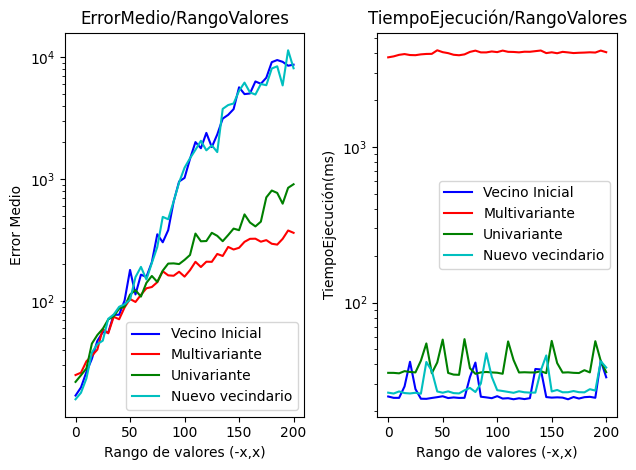

In [ ]:
plot_general(tam_rangos_univ,errs,tiems,err_stds,tiem_stds,labels,True,True)

##Análisis Estadístico

Este análisis tiene como objetivo indentificar si hay diferencias significativas
a la hora de usar diferentes vecindarios

Different distributions (reject H0) with alpha 0.05
Statistic 45.70731707317077, p-value 1.4783341217849966e-10
{'Multivariante': 1.2195121951219512, 'Univariante': 2.073170731707317, 'Nuevo vecindario': 2.707317073170732}
                          Comparison  Statistic (Z)       p-value  \
0       Multivariante vs Univariante       3.865103  1.110421e-04   
1  Multivariante vs Nuevo vecindario       6.736323  1.624434e-11   
2    Univariante vs Nuevo vecindario       2.871220  4.088913e-03   

   Adjusted alpha  Adjusted p-value  alpha         Results  
0        0.016667      3.331264e-04   0.05  H0 is rejected  
1        0.016667      4.873302e-11   0.05  H0 is rejected  
2        0.016667      1.226674e-02   0.05  H0 is rejected  


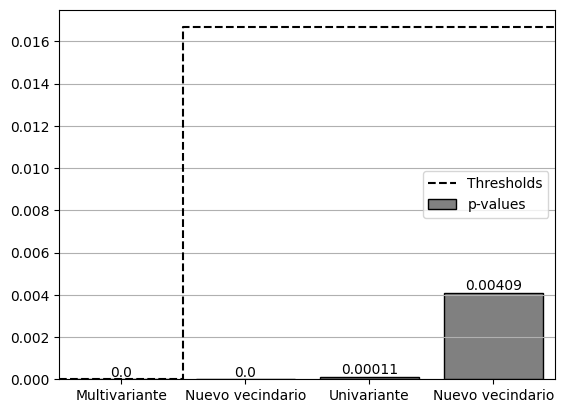

In [ ]:
test_fried_bonf(tam_rangos,errs,labels,None)

H0 es que se comportan igual

##Nuevo SA

Cálculo de temperatura inicial

In [ ]:
def generar_soluciones(vecinos,rango):
  l=7
  valorMin = rango*-1
  valorMax = rango
  n_vecinos = 1000
  for n in range(n_vecinos):
    solucion = []
    for i in range(l):
        variable = random.randint(valorMin,valorMax)
        solucion.append(variable)
    vecinos.append(solucion)

  return vecinos
def get_optimal_temperature(datos,rango):
  vecinos = []
  vecinos = generar_soluciones(vecinos,rango).copy()
  diferencias = []
  if len(vecinos)%2 != 0:
    vecinos.pop(random.randint(0,len(vecinos)-1))
  while len(vecinos)>1:
    i1 = random.randint(0,len(vecinos)-1)
    i2 = random.randint(0,len(vecinos)-1)
    while i1 == i2:
      i2 = random.randint(0,len(vecinos)-1)
    diff = evaluarSolucion(datos,vecinos[i1])-evaluarSolucion(datos,vecinos[i2])

    diferencias.append(abs(diff))
    if i1 > i2:
      vecinos.pop(i1)
      vecinos.pop(i2)
    else:
      vecinos.pop(i2)


  return max(diferencias)/len(diferencias)

In [ ]:
ts = []
n_it = 1000
for i in range(n_it):
  #print('Iteración ',i+1)
  t = get_optimal_temperature(datos,200)
  ts.append(t)

t = mean(ts)
print(mean(ts))

66.2051746472036


t = 66 parece un buen valor


In [ ]:
tam_rangos,err_med_nuevo_sa,tiem_med_nuevo_sa,err_std_nuevo_sa,tiem_std_nuevo_sa = eval_s(obtenerVecinoUnivariable,cool_05per,10,datos,200,5,40)


In [ ]:
tam_rangos,err_med_nuevo_sa2,tiem_med_nuevo_sa2,err_std_nuevo_sa2,tiem_std_nuevo_sa2 = eval_s(obtenerVecinoUnivariable,cool_05per,66,datos,200,5,40,True)

Iteración del rango (0,0)
Iteración del rango (-5,5)
Iteración del rango (-10,10)
Iteración del rango (-15,15)
Iteración del rango (-20,20)
Iteración del rango (-25,25)
Iteración del rango (-30,30)
Iteración del rango (-35,35)
Iteración del rango (-40,40)
Iteración del rango (-45,45)
Iteración del rango (-50,50)
Iteración del rango (-55,55)
Iteración del rango (-60,60)
Iteración del rango (-65,65)
Iteración del rango (-70,70)
Iteración del rango (-75,75)
Iteración del rango (-80,80)
Iteración del rango (-85,85)
Iteración del rango (-90,90)
Iteración del rango (-95,95)
Iteración del rango (-100,100)
Iteración del rango (-105,105)
Iteración del rango (-110,110)
Iteración del rango (-115,115)
Iteración del rango (-120,120)
Iteración del rango (-125,125)
Iteración del rango (-130,130)
Iteración del rango (-135,135)
Iteración del rango (-140,140)
Iteración del rango (-145,145)
Iteración del rango (-150,150)
Iteración del rango (-155,155)
Iteración del rango (-160,160)
Iteración del rango (-

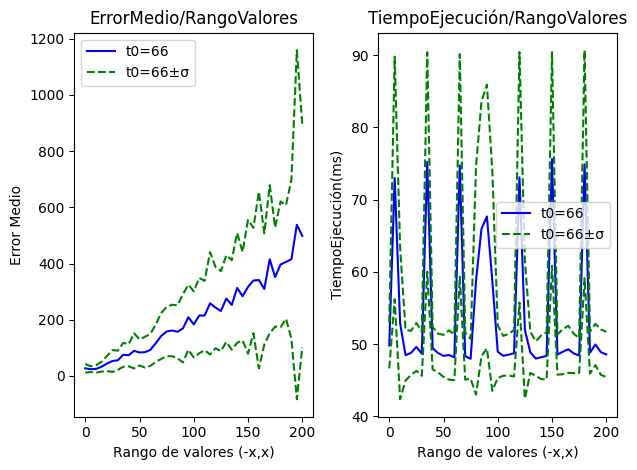

In [ ]:
plot_individual(tam_rangos,err_med_nuevo_sa2,tiem_med_nuevo_sa2,err_std_nuevo_sa2,tiem_std_nuevo_sa2,'t0='+str(66))

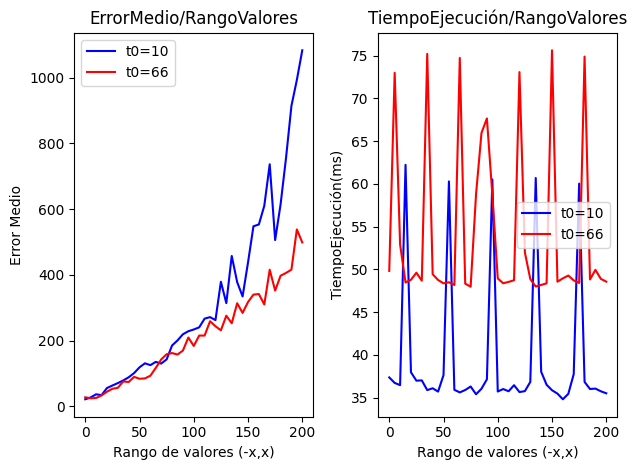

In [ ]:
plot_doble(tam_rangos,err_med_nuevo_sa,tiem_med_nuevo_sa,err_std_nuevo_sa,tiem_std_nuevo_sa,err_med_nuevo_sa2,tiem_med_nuevo_sa2,err_std_nuevo_sa2,tiem_std_nuevo_sa2,'t0=10','t0='+str(66),False,False)

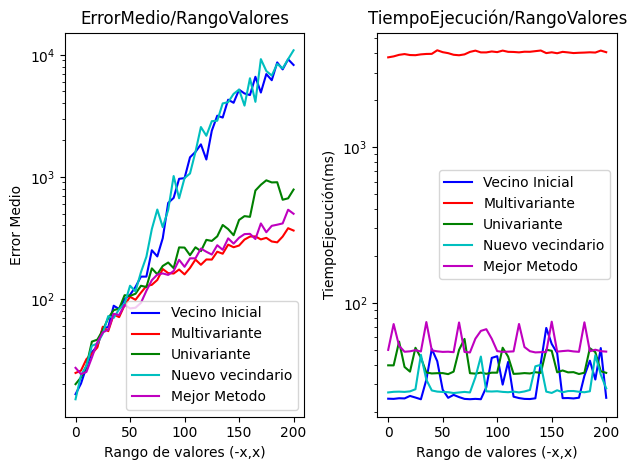

In [ ]:
errs.append(err_med_nuevo_sa2)
tiems.append(tiem_med_nuevo_sa2)
err_stds.append(err_std_nuevo_sa2)
tiem_stds.append(tiem_std_nuevo_sa2)
labels.append('Mejor Metodo')
plot_general(tam_rangos_univ,errs,tiems,err_stds,tiem_stds,labels,True,True)

##Análisis Estadístico

Different distributions (reject H0) with alpha 0.05
Statistic 66.62926829268292, p-value 4.632860761688562e-11
{'Multivariante': 1.5121951219512195, 'Univariante': 2.975609756097561, 'Nuevo vecindario': 3.5853658536585367, 'Mejor Metodo': 1.9268292682926829}
                         Comparison  Statistic (Z)       p-value  \
0     Mejor Metodo vs Multivariante       1.454178  1.458969e-01   
1       Mejor Metodo vs Univariante       3.678215  2.348716e-04   
2  Mejor Metodo vs Nuevo vecindario       5.816713  6.001617e-09   

   Adjusted alpha  Adjusted p-value  alpha         Results  
0        0.016667      4.376907e-01   0.05  H0 is accepted  
1        0.016667      7.046148e-04   0.05  H0 is rejected  
2        0.016667      1.800485e-08   0.05  H0 is rejected  


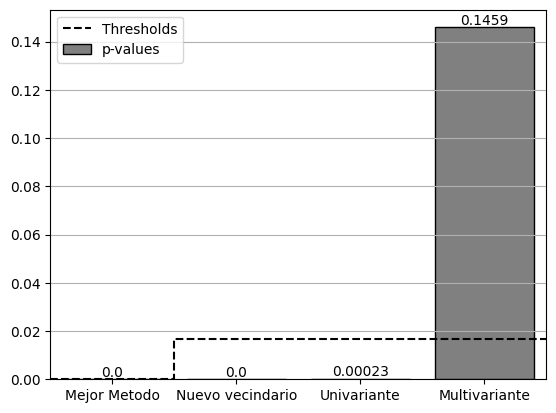

In [ ]:
test_fried_bonf(tam_rangos,errs,labels,'Mejor Metodo')

Usar T0=66, debido a que en general los resultados son mejores y según wilconxon los cambios son significativos

#Variable Neighborhood Search

##Funciones Generales

In [ ]:
def vns(func_h,func_vecinos,datos,valorMaxRango,incr,tam_med,verbose=False):


  tam_rangos = []
  err_med = []
  err_std = []
  tiem_med = []
  tiem_std = []
  tam = 0
  while tam <= valorMaxRango :
    if verbose:
      print(f'Iteración del rango ({tam*-1},{tam})')
    tam_rangos.append(tam)

    valorMin=tam*-1
    valorMax=tam
    err_it = []
    tiem_it = []
    for i in range(tam_med):
      tiempoInicio = time()
      s= func_h(func_vecinos,datos,valorMin,valorMax)
      tiem_it.append((time()-tiempoInicio)*1000)
      err_it.append(s[1])

    err_med.append(mean(err_it))
    err_std.append(stdev(err_it))
    tiem_med.append(mean(tiem_it))
    tiem_std.append(stdev(tiem_it))

    tam= tam+incr

  return tam_rangos,err_med,tiem_med,err_std,tiem_std

In [ ]:
def obtenerMejorVecino(solucion, datos):
    ##Obtención de los vecinos
    vecinos = []
    for i in range(len(solucion)):
        n1 = solucion.copy()

        n2 = solucion.copy()
        n1[i]+=1
        n2[i]-=1

        vecinos.append(n1)
        vecinos.append(n2)

    ##Obtención del mejor vecino
    mejorVecino = vecinos[0]
    mejorError = evaluarSolucion(datos, mejorVecino)
    for vecino in vecinos:
        error = evaluarSolucion(datos, vecino)
        if error < mejorError:
            mejorError = error
            mejorVecino = vecino
    return mejorVecino, mejorError

def obtenerMejorVecinoVentana(solucion,datos):

  ##Obtención de los vecinos
  vecinos = []
  for i in range(len(solucion)):

      for j in range(1,15):
        n1 = solucion.copy()
        n2 = solucion.copy()
        n1[i]+=j
        n2[i]-=j
        vecinos.append(n1)
        vecinos.append(n2)



  ##Obtención del mejor vecino
  mejorVecino = vecinos[0]
  mejorError = evaluarSolucion(datos, mejorVecino)
  for vecino in vecinos:
      error = evaluarSolucion(datos, vecino)
      if error < mejorError:
          mejorError = error
          mejorVecino = vecino
  return mejorVecino, mejorError


def vecino_variable(solucion,datos,modo):
  if modo:
    return obtenerMejorVecinoVentana(solucion,datos)
  else:
    return obtenerMejorVecino(solucion, datos)

##VNS_HC

In [ ]:
def hc_template(func_vecinos,datos,valorMin,valorMax):

    l=7
    solucion = []
    for i in range(l):
        variable = random.randint(valorMin,valorMax)
        solucion.append(variable)
    error = evaluarSolucion(datos, solucion)
    mejor_solucion = solucion.copy()

    #LS
    v2 = False
    vecino = func_vecinos(solucion, datos,v2)

    while vecino[1] < error :
      solucion = vecino[0]
      error = vecino[1]
      vecino = func_vecinos(solucion, datos,v2)
      if vecino[1] > error and v2 == False:
        v2 = True
        vecino = func_vecinos(solucion, datos,v2)


    return solucion, evaluarSolucion(datos,solucion)


In [ ]:
tam_rangos,err_med,tiem_med,err_std,tiem_std = vns(hc_template,vecino_variable,datos,200,5,40,True)

Iteración del rango (0,0)
Iteración del rango (-5,5)
Iteración del rango (-10,10)
Iteración del rango (-15,15)
Iteración del rango (-20,20)
Iteración del rango (-25,25)
Iteración del rango (-30,30)
Iteración del rango (-35,35)
Iteración del rango (-40,40)
Iteración del rango (-45,45)
Iteración del rango (-50,50)
Iteración del rango (-55,55)
Iteración del rango (-60,60)
Iteración del rango (-65,65)
Iteración del rango (-70,70)
Iteración del rango (-75,75)
Iteración del rango (-80,80)
Iteración del rango (-85,85)
Iteración del rango (-90,90)
Iteración del rango (-95,95)
Iteración del rango (-100,100)
Iteración del rango (-105,105)
Iteración del rango (-110,110)
Iteración del rango (-115,115)
Iteración del rango (-120,120)
Iteración del rango (-125,125)
Iteración del rango (-130,130)
Iteración del rango (-135,135)
Iteración del rango (-140,140)
Iteración del rango (-145,145)
Iteración del rango (-150,150)
Iteración del rango (-155,155)
Iteración del rango (-160,160)
Iteración del rango (-

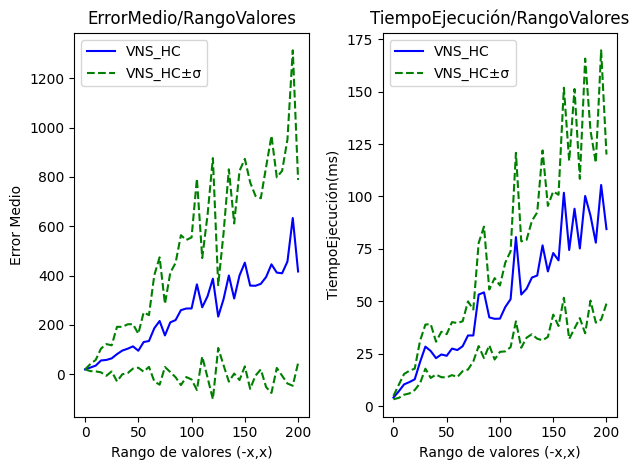

In [ ]:
plot_individual(tam_rangos,err_med,tiem_med,err_std,tiem_std,'VNS_HC')

Comparación con el mejor método de Hill Climbing

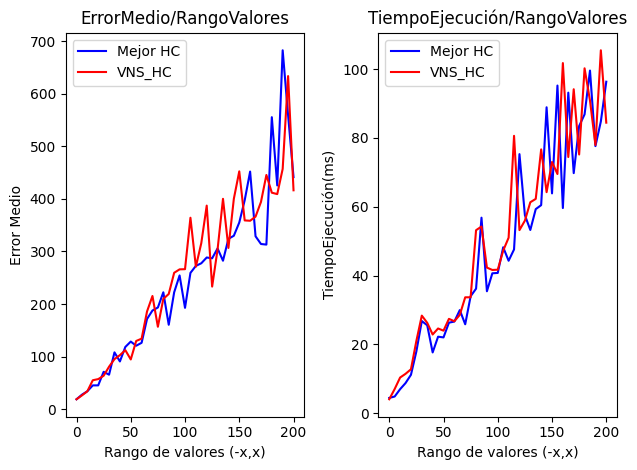

In [ ]:
plot_doble(tam_rangos,err_med_nue_sol,tiem_med_nue_sol,err_std_nue_sol,tiem_std_nue_sol,err_med,tiem_med,err_std,tiem_std,'Mejor HC','VNS_HC')

##Análisis Estadístico

In [ ]:
metodos = ['Mejor HC','VNS_HC']
results_scores = {met: [] for met in metodos}

In [ ]:
for i in range(len(tam_rangos)):
  results_scores['Mejor HC'].append(err_med_nue_sol[i])
  results_scores['VNS_HC'].append(err_med[i])

In [ ]:
dataset = pd.DataFrame(results_scores)
print(dataset)

      Mejor HC      VNS_HC
0    18.857143   18.857143
1    27.557143   26.196429
2    34.114286   34.100000
3    45.260714   55.046429
4    45.292857   57.189286
5    71.121429   63.539286
6    65.578571   80.807143
7   108.067857   95.239286
8    90.778571  102.792857
9   118.342857  112.250000
10  128.571429   94.564286
11  120.707143  129.735714
12  126.232143  134.114286
13  171.560714  185.871429
14  187.625000  215.257143
15  193.392857  156.710714
16  222.275000  209.700000
17  160.564286  219.075000
18  222.260714  259.385714
19  254.353571  265.917857
20  192.760714  266.228571
21  259.192857  364.064286
22  272.485714  270.960714
23  277.485714  315.767857
24  288.467857  387.121429
25  286.939286  233.167857
26  305.685714  303.628571
27  282.328571  400.050000
28  323.939286  306.628571
29  329.839286  400.117857
30  354.957143  452.264286
31  397.350000  358.971429
32  451.842857  358.325000
33  328.803571  366.178571
34  314.146429  394.100000
35  313.003571  445.417857
3

In [ ]:
results_to_test = dataset.copy()
alpha = 0.05
columns = list(results_to_test.columns)
results = []
statistic, p_value, critical_value, hypothesis = wilconxon(dataset, alpha)
print(hypothesis)
print(f"Statistic {statistic}, p-value {p_value}")


Same distributions (fail to reject H0) with alpha 0.05
Statistic 310.0, p-value 0.17890643952847185


##VNS_SA


In [ ]:
def obtenerVecino(solucion, datos):
    ##Obtención de los vecinos
    vecinos = []
    for i in range(len(solucion)):
        n1 = solucion.copy()
        n2 = solucion.copy()
        n1[i]+=1
        n2[i]-=1

        vecinos.append(n1)
        vecinos.append(n2)

    ##Obtengo un vecino aleatorio
    vecino=vecinos[random.randint(0, len(vecinos) - 1)]
    error = evaluarSolucion(datos, vecino)
    return vecino, error

def obtenerVecinoMayorRango(solucion, datos):
    ##Obtención de los vecinos
    vecinos = []
    for i in range(len(solucion)):
        for j in range(1,5):
          n1 = solucion.copy()
          n2 = solucion.copy()
          n1[i]+=j
          n2[i]-=j

          vecinos.append(n1)
          vecinos.append(n2)

    ##Obtengo un vecino aleatorio
    vecino=vecinos[random.randint(0, len(vecinos) - 1)]
    error = evaluarSolucion(datos, vecino)
    return vecino, error

def vecino_variable_sa(solucion,datos,modo):
  if modo:
    return obtenerVecinoMayorRango(solucion, datos)
  else:
    return obtenerVecino(solucion,datos)

In [ ]:
def sa_template(func_vecinos,datos,valorMin,valorMax):

    t0 = 10
    l=7 #Funcion del tipo y = ax^6+bx^5+cx^4+dx^3+ex^2+fx+g
    ##Creamos una solucion aleatoria
    solucion = []
    for i in range(l):
        variable = random.randint(valorMin,valorMax)
        solucion.append(variable)
    error = evaluarSolucion(datos, solucion)
    t=t0
    v2 = False
    it=0
    while t > 0.05:
        ##Obtenemos un vecino al azar
        vecino = func_vecinos(solucion, datos,v2)
        incremento = vecino[1]-error

        if incremento < 0:
            error = vecino[1]
            solucion = vecino[0]
        elif random.random() < math.exp(-abs(incremento) / t):
            error = vecino[1]
            solucion = vecino[0]

        it+=1
        t=0.995*t
        if v2 == False and t<=0.2*t0:
          v2 = True
        #print("Error de la solución: ", error)
        #print("Temperatura: ", t)
    return solucion, error

In [ ]:
tam_rangos,err_med,tiem_med,err_std,tiem_std = vns(sa_template,vecino_variable_sa,datos,200,5,40)

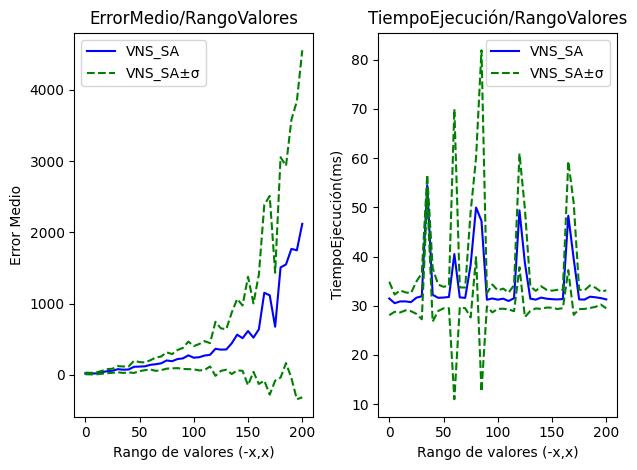

In [ ]:
plot_individual(tam_rangos,err_med,tiem_med,err_std,tiem_std,'VNS_SA')

Comparación con el mejor método de Enfriamiento Simulado

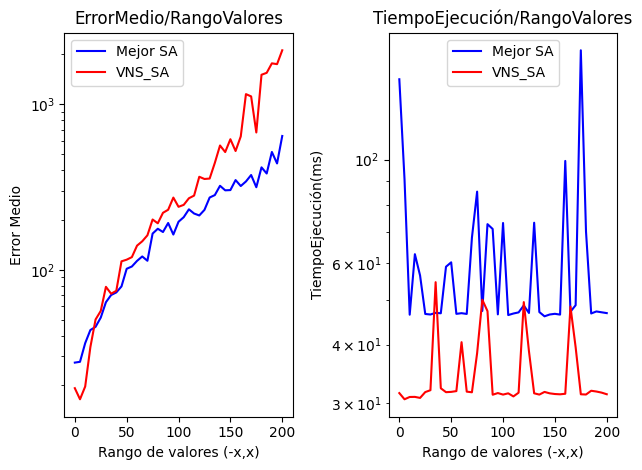

In [ ]:
plot_doble(tam_rangos,err_med_nuevo_sa2,tiem_med_nuevo_sa2,err_std_nuevo_sa2,tiem_std_nuevo_sa2,err_med,tiem_med,err_std,tiem_std,'Mejor SA','VNS_SA',True,True)

##Análisis Estadístico

In [ ]:
metodos = ['Mejor SA','VNS_SA']
results_scores = {met: [] for met in metodos}

In [ ]:
for i in range(len(tam_rangos)):
  results_scores['Mejor SA'].append(err_med_nuevo_sa2[i])
  results_scores['VNS_SA'].append(err_med[i])

In [ ]:
dataset = pd.DataFrame(results_scores)
print(dataset)

      Mejor SA       VNS_SA
0    27.439286    19.221429
1    27.750000    16.471429
2    35.978571    19.675000
3    43.185714    34.067857
4    45.139286    49.996429
5    51.335714    56.321429
6    63.632143    78.789286
7    70.300000    71.589286
8    72.892857    74.539286
9    79.235714   112.360714
10  101.314286   114.978571
11  104.542857   119.132143
12  113.075000   139.817857
13  120.232143   148.500000
14  113.253571   161.425000
15  165.307143   201.103571
16  176.857143   190.807143
17  168.960714   220.800000
18  191.589286   230.346429
19  163.139286   272.921429
20  194.971429   240.025000
21  207.721429   246.600000
22  231.721429   270.310714
23  218.603571   280.575000
24  212.767857   364.607143
25  229.950000   353.553571
26  273.142857   355.671429
27  282.585714   442.335714
28  321.625000   563.525000
29  301.900000   514.289286
30  302.921429   614.857143
31  348.200000   521.860714
32  320.525000   639.364286
33  341.535714  1152.182143
34  373.642857  1115

In [ ]:
results_to_test = dataset.copy()
alpha = 0.05
columns = list(results_to_test.columns)
results = []
statistic, p_value, critical_value, hypothesis = wilconxon(dataset, alpha)
print(hypothesis)
print(f"Statistic {statistic}, p-value {p_value}")


Different distributions (reject H0) with alpha 0.05
Statistic 30.0, p-value 2.104944085701277e-07
